# Исследование надежности заемщиков


# Обзор данных

Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

### Произведем первичное исследование данных

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

Посмотрим, каким образом заполнен наш датасет: какие есть неточности заполнения, где имеются пропуски данных, положительные и отрицательные значения и регистр текстовых полей.

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


<b> Вывод </b>

Датасет состоит из 11 колонок: текстовые и числовые. Числовые подразделяются на целые и вещественные. В данном случае `'days_employed'` и `'total_income'` нужно привести к типу int, т.к. дробная часть кол-ва рабочих дней и заработка нас мало интересует и мало повлияет на дальнейшее исследование, лучше привести все числовые данные к одну типу `'int'`, также привести к нижнему регистру данные столбца `'education'` и заполнить пропуски в столбцах `'days_employed'` и `'total_income'` медианными значениями.

## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Пропуски имеются как раз в столбцах: `'days_employed'` и `'total_income'`. Заполним эти пропуски медианными значениями на следующем шаге.

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

Теперь мы имеем положительные значения "дней занятости", что соотвествует действительности.

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

Обратим внимание, что число детей "-1" - нереальное, а число "20" детей - очень маловероятное. Исключим эти значения из датасета.

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

Теперь значения кол-ва детей выглядят более реалистично.

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)
data['days_employed'] = data['days_employed'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)
display(data)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529,43,среднее,1,гражданский брак,1,F,компаньон,0,224791,операции с жильем,B,операции с недвижимостью
21521,0,343937,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999,сделка с автомобилем,C,операции с автомобилем
21522,1,2113,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672,недвижимость,C,операции с недвижимостью
21523,3,3112,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093,на покупку своего автомобиля,B,операции с автомобилем


Итак, предобработка проведена: `'education'` в нижнем регистре, пропуски в `'days_employed'`  и `'total_income'` заполнены медианными значениями, приведены к типу `'int'` и положительным значениям, удалены дубликаты, проведена категоризация `'total_income'` - `'total_income_category'` и `'purpose'` - `'purpose_category'`.

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

,count,sum,mean
children,,,
-1,47,1,0.021277
0,14149,1063,0.075129
1,4818,444,0.092154
2,2055,194,0.094404
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000
20,76,8,0.105263


<AxesSubplot:xlabel='children'>

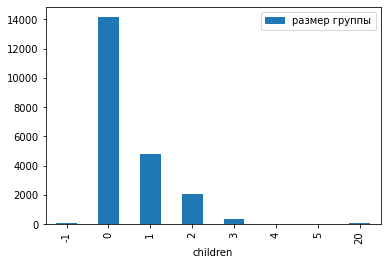

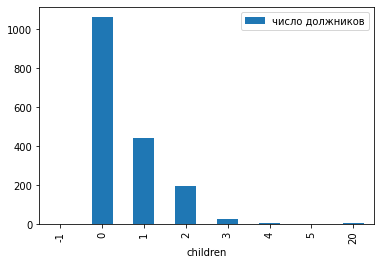

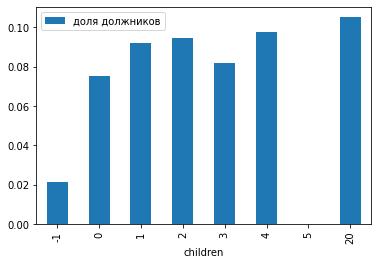

In [4]:
display(data.groupby('children')['debt'].agg(['count', 'sum', 'mean']))
# группируем заемщиков по столбцу 'children' - кол-во детей в семье и находим размер групп заемщиков отн-о количества детей.
data.groupby('children', as_index=False)['debt'].agg(['count']).rename(columns={'count':'размер группы'}).plot.bar()
# группируем заемщиков по столбцу 'children' и строим зависимость количества должников отн-о количества детей.
data.groupby('children', as_index=False)['debt'].agg(['sum']).rename(columns={'sum': 'число должников'}).plot.bar()
# группируем заемщиков по столбцу 'children' и строим зависимость доли должников отн-о количества детей.
data.groupby('children', as_index=False)['debt'].agg(['mean']).rename(columns={'mean': 'доля должников'}).plot.bar()


**Вывод:** 
1. На первом графике отмечается убывающая тенденция размера группы от количества детей: меньшее количество семей обладают всё большим количеством детей. 5 детей всего лишь у 9ти семей.
2. Число должников также имеет убывающую тенденцию, т.к. должники появляются из всё той же выборки размера группы от количества детей.
3. Лучшими заемщиками являются семьи без детей и семьи с 3-мя детьми. Наихудшими - с 1-им, 2-мя и 4-мя детьми. При этом семьи с 5-ю детьми не учитываются, т.к. выборка в 9 семей очень низкая для построения гипотезы.
    

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

,count,sum,mean
family_status,,,
Не женат / не замужем,2796,273,0.097639
в разводе,1189,84,0.070648
вдовец / вдова,951,63,0.066246
гражданский брак,4134,385,0.093130
женат / замужем,12261,927,0.075606


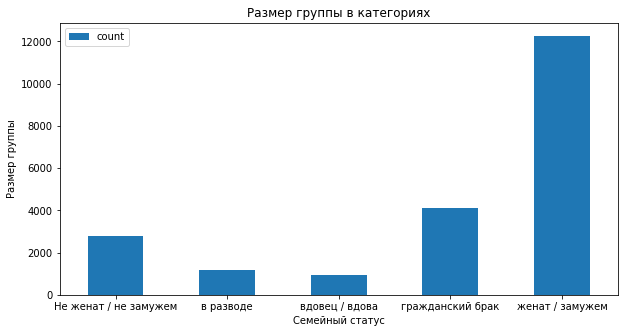

Text(0, 0.5, 'Доля должников, %')

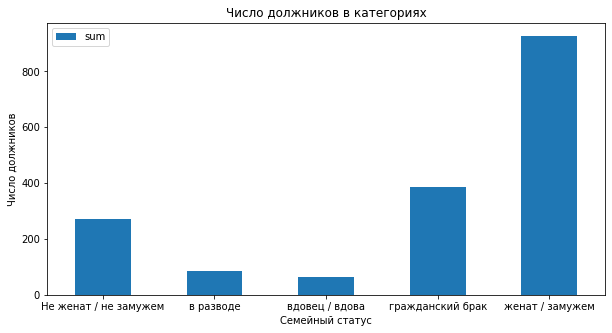

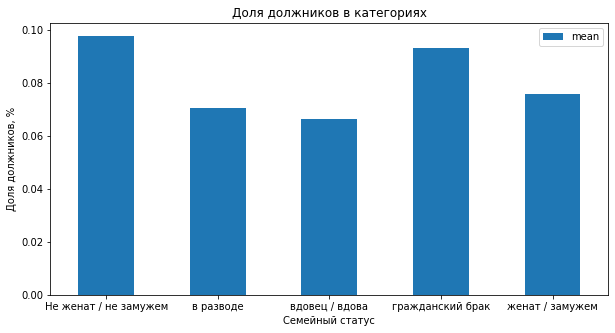

In [23]:
import matplotlib.pyplot as plt

display(data.groupby('family_status')['debt'].agg(['count', 'sum', 'mean']))

# группируем заемщиков по столбцу 'family_status' - семейное положение и находим размер групп заемщиков отн-о семейного положения.
data.groupby('family_status', as_index=False)['debt'].agg(['count'])\
    .plot(kind='bar', title = 'Размер группы в категориях',
          figsize = (10,5))
plt.xticks(rotation = 0)
plt.xlabel('Семейный статус')
plt.ylabel('Размер группы')
plt.show()

# группируем заемщиков по столбцу 'family_status' и строим зависимость количества должников отн-о семейного положения.
data.groupby('family_status', as_index=False)['debt'].agg(['sum'])\
    .plot(kind='bar', title = 'Число должников в категориях',
          figsize = (10,5))
plt.xticks(rotation = 0)
plt.xlabel('Семейный статус')
plt.ylabel('Число должников')

# группируем заемщиков по столбцу 'family_status' и строим зависимость доли должников отн-о семейного положения.
data.groupby('family_status', as_index=False)['debt'].agg(['mean'])\
    .plot(kind='bar', title = 'Доля должников в категориях',
          figsize = (10,5))
plt.xticks(rotation = 0)
plt.xlabel('Семейный статус')
plt.ylabel('Доля должников, %')

# Ваш код будет здесь. Вы можете создавать новые ячейки.

*Вывод:** 
1. Больше всего кредитов берут группы: "женат / замужем", "гражданский брак";
2. Самое большое число должников в этих же группах, при этом в группе "женат / замужем" должников в 3.2 раза больше, чем "гражданский брак";
3. Доли должников примерно равные, но более 7% должников превышают две группы: "Не женат / не замужем" - 9.7%, "гражданский брак" - 9.3%.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

,count,sum,mean
total_income_category,,,
A,25,2,0.080000
B,5014,354,0.070602
C,15921,1353,0.084982
D,349,21,0.060172
E,22,2,0.090909


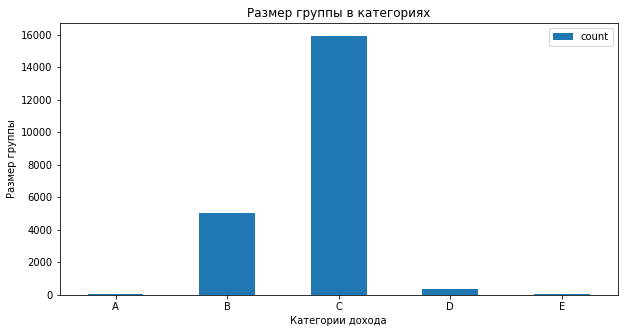

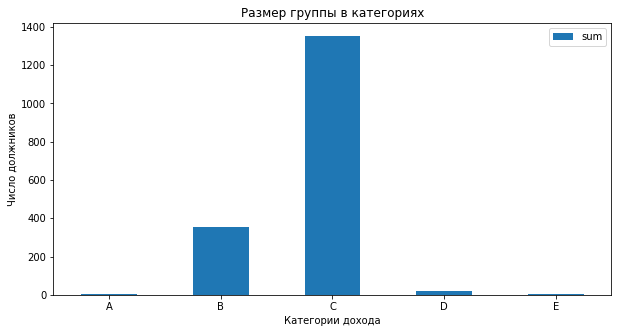

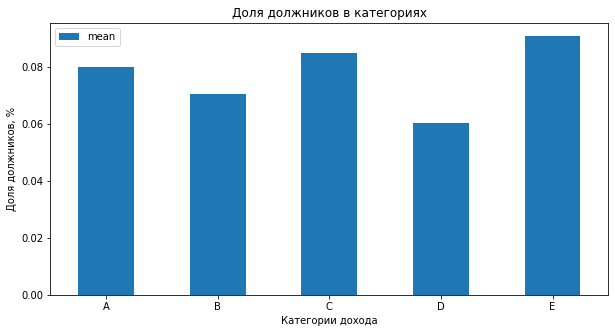

In [25]:
import matplotlib.pyplot as plt

display(data.groupby('total_income_category')['debt'].agg(['count', 'sum', 'mean']))


# группируем заемщиков по столбцу 'total_income_category' - категории дохода, разделенные на группы и найдем размер групп заемщиков отн-о категорий дохода.
data.groupby('total_income_category', as_index = False)['debt'].agg(['count'])\
    .plot(kind = 'bar', title = 'Размер группы в категориях',
         figsize = (10,5))
plt.xticks(rotation = 0) #Разворот подписей на оси X
plt.xlabel('Категории дохода')
plt.ylabel('Размер группы')
plt.show()

# группируем заемщиков по столбцу 'total_income_category' - категории дохода, разделенные на группы и найдем размер групп заемщиков отн-о категорий дохода.
data.groupby('total_income_category', as_index = False)['debt'].agg(['sum'])\
    .plot(kind = 'bar', title = 'Размер группы в категориях',
         figsize = (10,5))
plt.xticks(rotation = 0) #Разворот подписей на оси X
plt.xlabel('Категории дохода')
plt.ylabel('Число должников')
plt.show()

# группируем заемщиков по столбцу 'total_income_category' и строим зависимость доли должников отн-о категорий дохода.
data.groupby('total_income_category', as_index = False)['debt'].agg(['mean'])\
    .plot(kind = 'bar', title = 'Доля должников в категориях',
         figsize = (10,5))
plt.xticks(rotation = 0) #Разворот подписей на оси X
plt.xlabel('Категории дохода')
plt.ylabel('Доля должников, %')
plt.show()

# Ваш код будет здесь. Вы можете создавать новые ячейки.

**Вывод:** 
1. Больше всего заемщиков в категории 'C': `50001-200000 руб.` порядка `16000` человек в 3.1 раза выше, чем в группе `'В'`;
2. Число должников также прямопропорционально количеству заемщиков: группа `'C'` лидирует, на втором месте группа `'В'`;
3. Доля должников колеблется около `8%` независимо от категории заработка. Выделяется группа `'D' с 6%` должников.
4. Если сравнивать две наиболее многочисленные группы: `'В'` и `'C'`, то лучше возвращают свои кредиты группа `'В'` их доля должников соотв-т `7%`. Но не стоит отсекать самую многочисленную группу дохода `'C'`, т.к. эта группа зарабатывает существенно больше `'В'`, то она склонна брать кредиты большего размера. Поэтому если у группы `'C'` кредиты большей суммы и большего срока, то вероятность просрочить платеж также вырастает. Поэтому если возникают два кандидата на кредит из группы `'В'` или `'C'`, то стоит отдать предпочтение кандидату из `'В'`.
    

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

,count,sum,mean
purpose_category,,,
операции с автомобилем,4279,400,0.093480
операции с недвижимостью,10751,780,0.072551
получение образования,3988,369,0.092528
проведение свадьбы,2313,183,0.079118


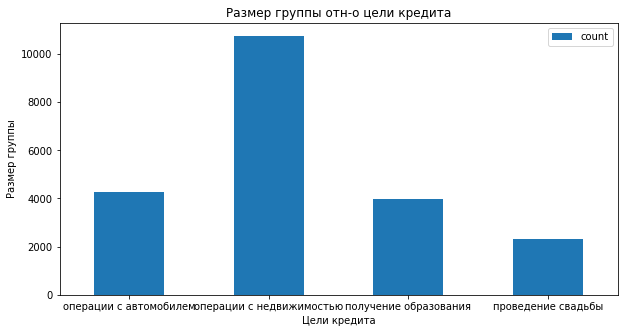

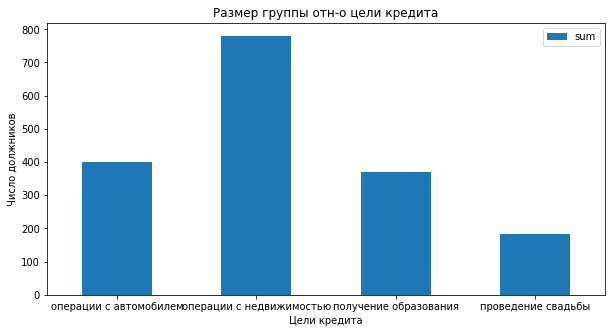

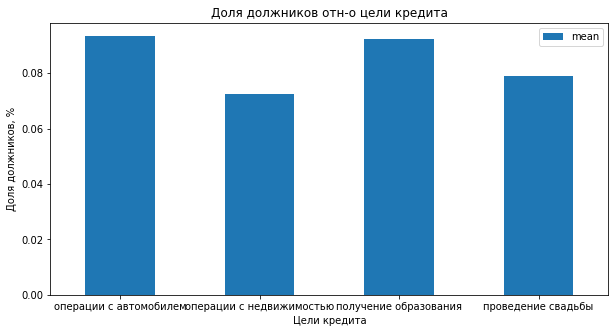

In [26]:
display(data.groupby('purpose_category')['debt'].agg(['count', 'sum', 'mean']))

# группируем заемщиков по столбцу 'purpose_category' - цели кредита и найдем размер групп заемщиков отн-о цели кредита.
data.groupby('purpose_category', as_index = False)['debt'].agg(['count'])\
    .plot(kind = 'bar', title = 'Размер группы отн-о цели кредита',
         figsize = (10,5))
plt.xticks(rotation = 0) 
plt.xlabel('Цели кредита')
plt.ylabel('Размер группы')
plt.show()

# группируем заемщиков по столбцу 'purpose_category' и найдем число должников отн-о цели кредита.
data.groupby('purpose_category', as_index = False)['debt'].agg(['sum'])\
    .plot(kind = 'bar', title = 'Размер группы отн-о цели кредита',
         figsize = (10,5))
plt.xticks(rotation = 0) 
plt.xlabel('Цели кредита')
plt.ylabel('Число должников')
plt.show()

# группируем заемщиков по столбцу 'purpose_category' и строим зависимость доли должников отн-о цели кредита.
data.groupby('purpose_category', as_index = False)['debt'].agg(['mean'])\
    .plot(kind = 'bar', title = 'Доля должников отн-о цели кредита',
         figsize = (10,5))
plt.xticks(rotation = 0)
plt.xlabel('Цели кредита')
plt.ylabel('Доля должников, %')
plt.show()



# Ваш код будет здесь. Вы можете создавать новые ячейки.

**Вывод:** 
1. Больше всего кредитов берут на операции с недвижимостью порядка 10000 человек, с отрывом в 2.5 раза второе место занимают цели: "операции с автомобилем" и "получение образования";
2. Число должников прямо пропорционально числу заемщиков;
3. Процент числа задолжников лидирует у "операции с автомобилем" - 9.3% и "получение образования" - 9.2%. Что и ожидалось увидеть: размер кредита и его продолжительность в случае ипотеки 10 и более лет, автокредит 5 и более лет - увеличивают вероятность не выплаты кредита в срок.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 
1. Заемщики пожелали сокрыть эту информацию;
2. Работники банка забыли её внести;
3. Утеря данных из-за технических проблем.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

**Ответ:**  
С помощью медианы можно найти именно тот показатель, который ближе всего к истинно среднему. Медиана позволяет избавиться от выбросов в данных. Допустим, в случае заработной платы, у кого-то может быть МРОТ 12.000 или стипендия отличника СПбГУ 1.200 руб., а у 10-15 человек из выборки, допустим, ТОП-менеджмент или предприниматели, заработная плата может быть 500.000 или 1.500.000 руб. Среднее слишком сильно "уведет" нас от более реального показателя зарплаты, а медианное отсортирует значения по возрастанию и выберет значение по середине. Медиана подходит для распределений, которые не явл-я нормальными: ХИ-квардрат, экспоненциальное, лог-нормальное и пр. 

### Шаг 4: общий вывод.

Был рассмотрен датасет заемщиков банка.

На первом этапе была произведена предобработка данных: заполнили пропуски медианными значениями в столбцах зарплата 'total_income' и  дни занятости 'days_employed', в текстовых полях привели значения к нижнему регистру, рассмотрели кол-во детей в семье и убрали нереальное значение '-1' и маловероятное '20', провели категоризацию данных: разбили зарплаты заемщиков на группы от 'A' до 'E' и цели кредита (операции с автомобилем, операции с недвижимостью, получение образования, проведение свадьбы).

При сборе данных столбец 'edication' стоит заполнять нижним регистром, в дни занятости 'days_employed' вводить целые положительные значения. Выдать обязательное требование работникам банка и программистам, заполняющим таблицу данных: заполнять столбы 'days_employed' и 'total_income', т.к. эти столбцы явл-ся одними из наиболее важных в датафрейме.

Итак, перейдем к основным выводам, которые мы получили в исследовании:


1. Чем большей детей в семье, тем больше доля должников. При этом семьи с 3-мя детьми на равне с семьями без детей явл-ся лучшими заемщиками.При этом семьи с 5-ю детьми не учитываются, т.к. выборка в 9 семей очень низкая для построения гипотезы. 
2. Больше всего кредитов берут люди с семейным положением: "женат / замужем" и "гражданский брак", на 3-ем месте  "не женат / не замужем", но наибольше кол-во должников в группах "не женат / не замужем" и "гражданский брак". 
3. Больше всего кредитов берут люди с категориями дохода 'B' и 'C'. Если сравнивать две наиболее многочисленные группы: 'В' и 'C', то лучше возвращают свои кредиты группа 'В' их доля должников соотв-т 7%.  Но не стоит отсекать самую многочисленную группу дохода 'C', т.к. эта группа зарабатывает существенно больше 'В', то она склонна брать кредиты большего размера. Поэтому если у группы 'C' кредиты большей суммы и большего срока, то вероятность просрочить платеж также вырастает. Поэтому если возникают два кандидата на кредит из группы 'В' или 'C', то стоит отдать предпочтение кандидату из 'В'. Также выделяется группа 'D' с 6% должников - это самая надежная группа заемщиков.
4. Больше всего кредитов берут на "операции с недвижимостью", на втором месте: "операции с автомобилем" и "получение образования". Наибольший процент задолжников  у автокредитов - 9.3% и кредиты на образование - 9.2%.